In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)
data = pd.read_csv('exams.csv')
data.columns = [c.replace(' ','_') for c in data.columns]
originalFeatures = data.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures', originalFeatures)
print(data.head())

originalFeatures count 8
originalFeatures Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')
   gender race/ethnicity parental_level_of_education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  


In [2]:
"""
I will select parental_level_of_education as our discrete attribute
Firstly, I need to rename redundant attributes
"""
dataParent = data['parental_level_of_education'].replace('some high school', 'high school')
df = data.loc[data['parental_level_of_education']=='some high school','parental_level_of_education']='high school'
df = pd.DataFrame(data)
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
pd.DataFrame({'parental level of education':data.parental_level_of_education})

,parental level of education
0,high school
1,high school
2,some college
3,high school
4,associate's degree
...,...
995,high school
996,associate's degree
997,high school
998,some college


In [4]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [5]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#feature_arry = ohe.fit_transform(df[["gender","race/ethnicity","parental_level_of_education","lunch","test_preparation_course"]]).toarray()
#ohe.categories_
#feature_labels = ohe.categories_
#np.hstack(feature_labels)
#feature_labels = np.hstack(feature_labels)
#new_df = pd.DataFrame(feature_arry, columns = feature_labels)
#feature_labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#data["gender"] = le.fit_transform(data["gender"])
data["race/ethnicity"] = le.fit_transform(data["race/ethnicity"])
#data["parental_level_of_education"] = le.fit_transform(data["parental_level_of_education"])
#data["lunch"] = le.fit_transform(data["lunch"])
data["test_preparation_course"] = le.fit_transform(data["test_preparation_course"])
df = pd.DataFrame(data)
df


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,0,high school,standard,0,67,67,63
1,female,3,high school,free/reduced,1,40,59,55
2,male,4,some college,free/reduced,1,59,60,50
3,male,1,high school,standard,1,77,78,68
4,male,4,associate's degree,standard,0,78,73,68
...,...,...,...,...,...,...,...,...
995,male,2,high school,standard,1,73,70,65
996,male,3,associate's degree,free/reduced,0,85,91,92
997,female,2,high school,free/reduced,1,32,35,41
998,female,2,some college,standard,1,73,74,82


In [6]:
'''
1. Applying Decision Tree Classification
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
X = df[["race/ethnicity","test_preparation_course"]].values
y = df['parental_level_of_education'].values
print(cl('X variable samples : {}'.format(X[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y[:5]), attrs = ['bold']))

X variable samples : [[0 0]
 [3 1]
 [4 1]
 [1 1]
 [4 0]]
Y variable samples : ['high school' 'high school' 'some college' 'high school'
 "associate's degree"]


In [8]:
'''
Splitting data
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'black'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'black'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'black'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'black'))

X_train shape : (700, 2)
X_test shape : (300, 2)
y_train shape : (700,)
y_test shape : (300,)


In [9]:
#clf = DecisionTreeClassifier() # Creating decision tree classifier obj
#clf = clf.fit(X_train, y_train) # Training decision tree classifier
#y_pred = clf.predict(X_test) #Predict the response for test dataset
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)

In [10]:
print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 41%


Index(['race/ethnicity', 'test_preparation_course'], dtype='object')

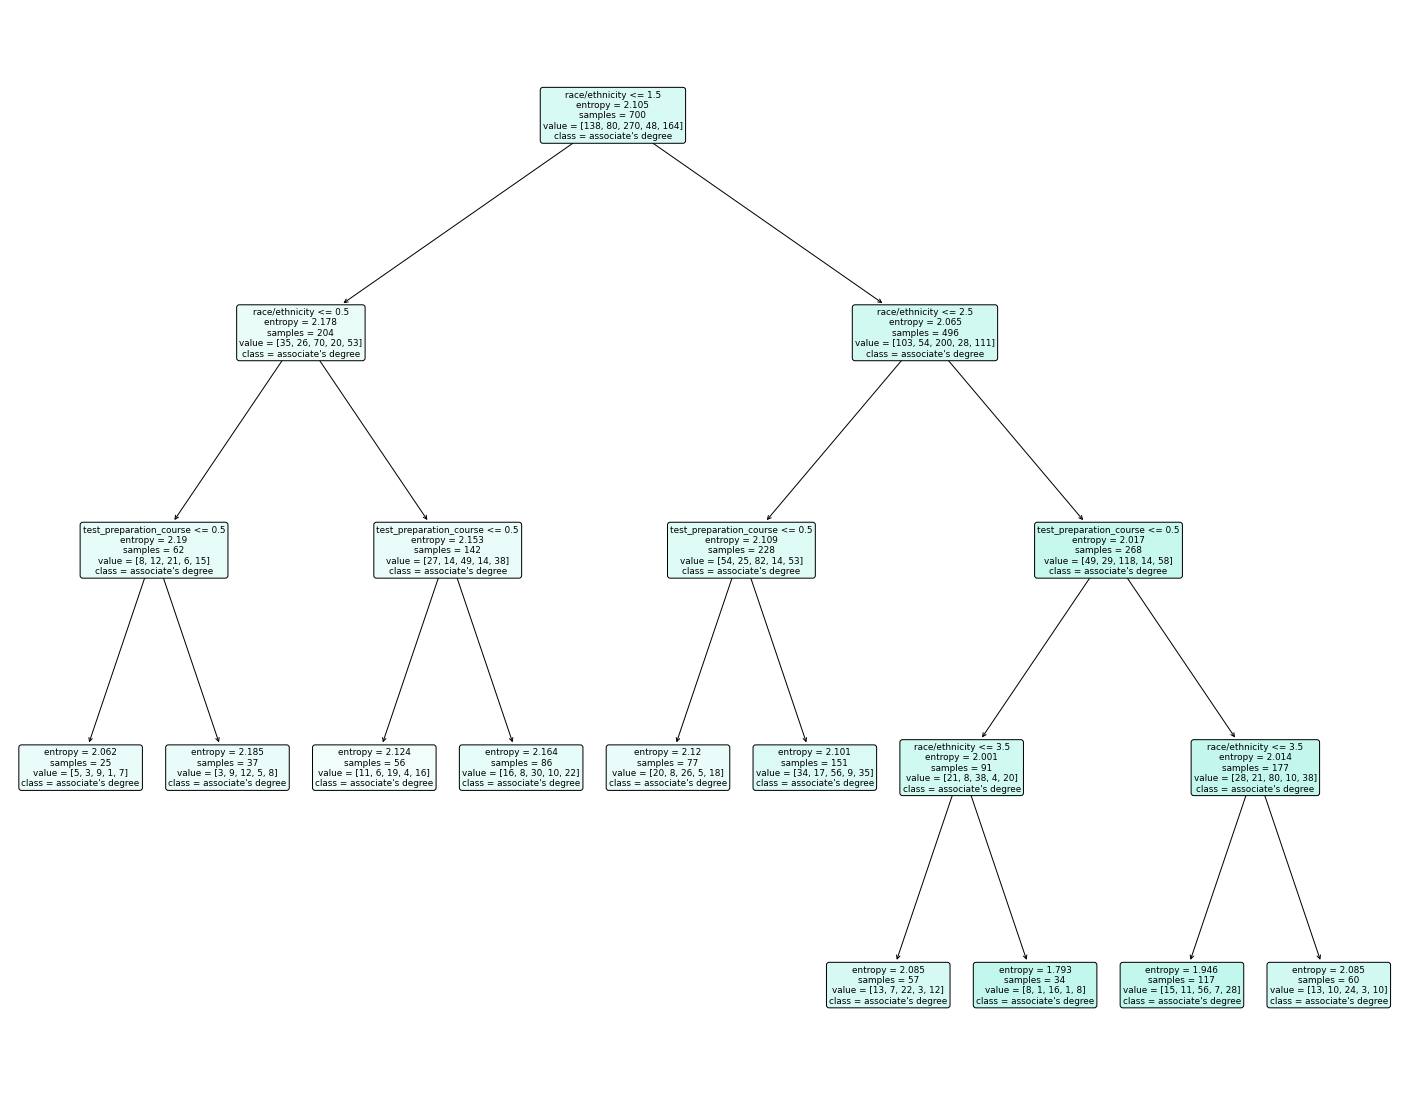

In [11]:
arr = [1,4]
feature_names = df.columns[arr]
target_names = df["parental_level_of_education"].unique().tolist()
plot_tree(model, feature_names = feature_names,
         class_names = target_names,
         filled = True,
         rounded = True)
plt.savefig('tree.png')
feature_names

In [12]:
'''
kNN algorithm
'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test)) #predict on dataset which model has not seen before
print(knn.score(X_test, y_test)) #calculate the accuracy of the model

['high school' 'high school' 'some college' 'some college' 'high school'
 'some college' 'high school' 'some college' 'high school' 'high school'
 'high school' 'high school' 'some college' 'some college' 'high school'
 'high school' 'high school' 'high school' 'high school' 'high school'
 'high school' 'high school' 'high school' 'high school' 'high school'
 'high school' 'high school' 'high school' 'high school' 'high school'
 'high school' 'high school' 'some college' 'some college' 'some college'
 'high school' 'high school' 'some college' 'some college' 'high school'
 'high school' 'high school' 'some college' 'high school' 'high school'
 'high school' 'high school' 'high school' 'high school' 'high school'
 'high school' 'high school' 'high school' 'some college' 'high school'
 'high school' 'high school' 'some college' 'high school' 'some college'
 'high school' 'some college' 'some college' 'high school' 'some college'
 'high school' 'high school' 'some college' 'high school' '

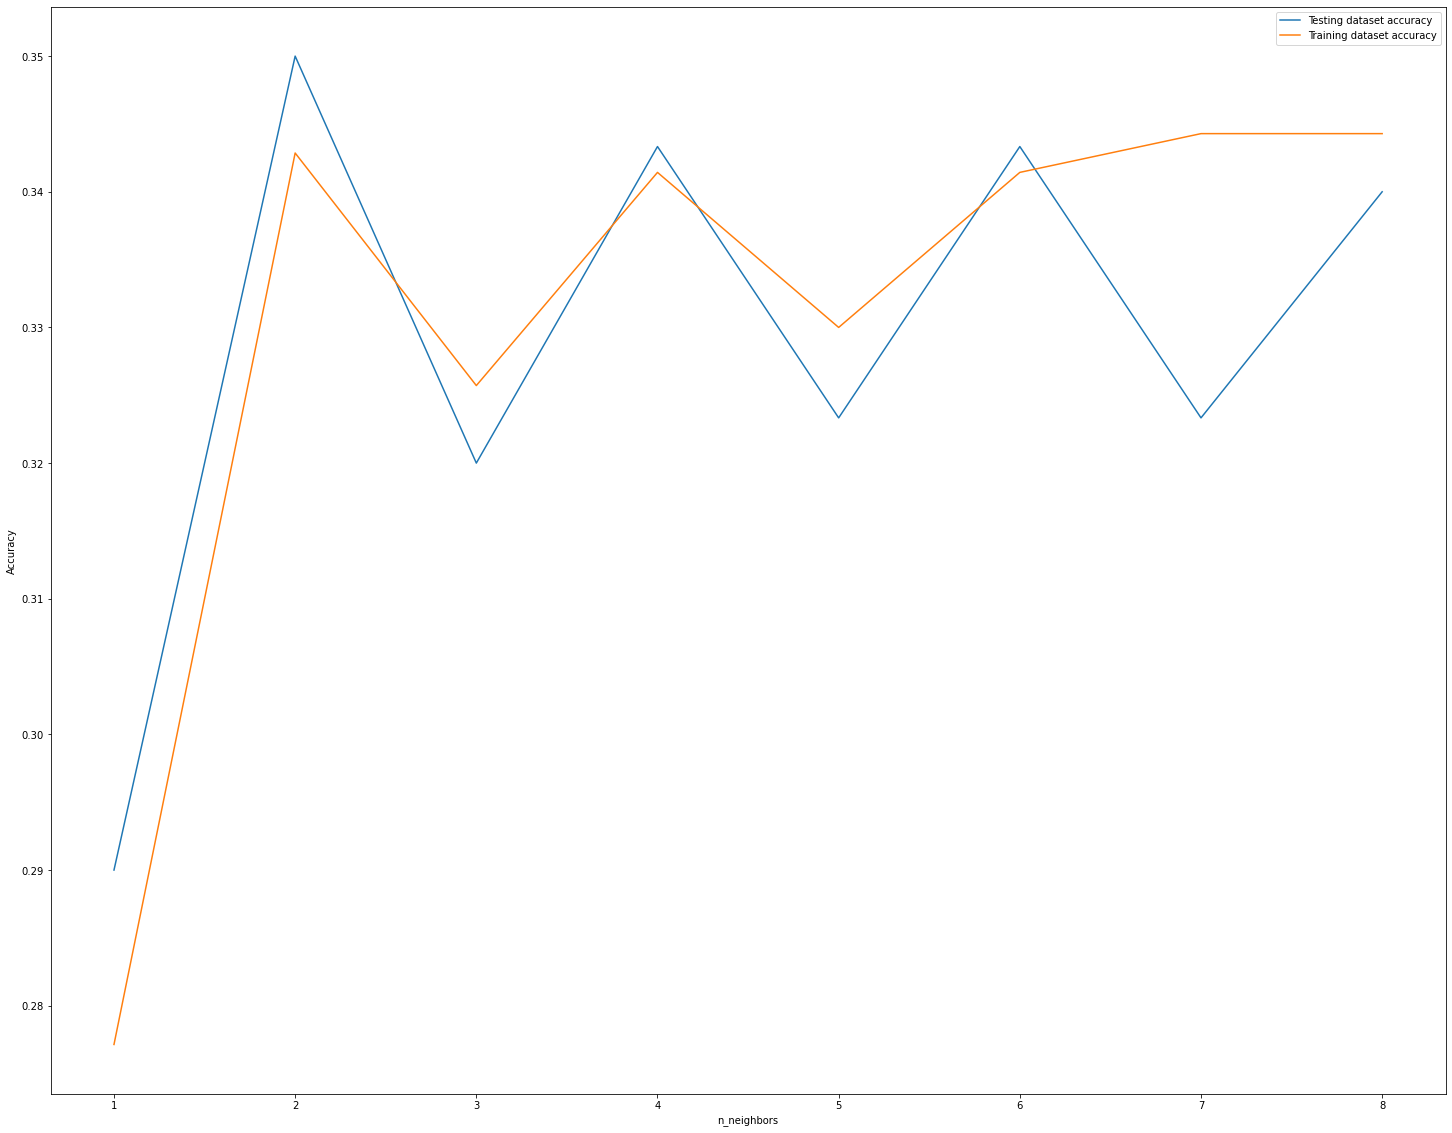

In [13]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
#Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:

'''
Gaussian Naive Bayes
'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 300 points : 177
